## Health Insurance Beneficiaries in the US
##### Ritika Chopra (rc47535)
Time and time again, health care in the United States has been criticized for their issues related to equitable access and treatment across groups. This report uses health insurance beneficiary data in the United States to get a basic understanding of whether health care is equitable across sex, previous health history, and regions in the US.

In [20]:
#import packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Import and Describe Data


In [6]:
#read in data
medinsurance = pd.read_csv('https://raw.githubusercontent.com/chopraritika19/personal/main/insurance.csv')
medinsurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#get information on data (such as number of observations and variables)
medinsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This dataset provides information about 1338 different healthcare beneficiaries and information related to their health and medical bills. There are 1338 observations in this data set, with 7 total columns.

#### 2. Categorical Variables - Statistics and Visualizations


In [8]:
#Frequency counts of sex
medinsurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

There are 676 male health insurance beneficiaries and 662 male health insurance beneficiaries.

In [9]:
#Frequency counts of smokers
medinsurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

There are 1064 non-smokers in this dataset and 274 smokers.

(-1.1040121656056667,
 1.1001910555050318,
 -1.104486483140735,
 1.1023569618236218)

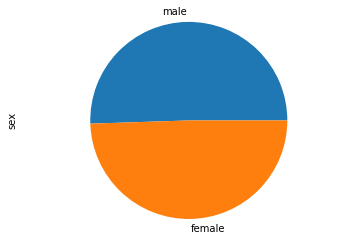

In [12]:
# Create a pie chart to display proportions
medinsurance['sex'].value_counts() \
.plot(kind = "pie") \
.axis('equal') # equal aspect ratio

There appears to be a largely equal distribution between male and female health insurance beneficiaries, with males making up a slightly higher proportion.

(-1.1018718496698334,
 1.1000891356985636,
 -1.1027154146109623,
 1.1011093550812814)

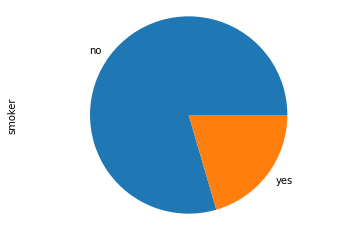

In [13]:
# Create a pie chart to display proportion 
medinsurance['smoker'].value_counts() \
.plot(kind = "pie") \
.axis('equal') # equal aspect ratio

The majority of health insurance beneficiaries are not smokers. 

#### 2. Quantitative Variables - Statistics and Visualizations

In [17]:
#Find average charges and their standard deviations for both males and females
(medinsurance.filter(['sex', 'charges'])
.groupby(['sex'])
.agg(['mean','std'])
.sort_values(by = ('sex'), ascending = False)
)

charges              
                mean           std
sex                               
male    13956.751178  12971.025915
female  12569.578844  11128.703801

The mean medical costs billed by health insurance for male beneficiaries is ```$```13,956.75 with a standard deviation of ```$```12,971.03. The mean medical costs billed by health insurance for female beneficiaries is ```$```12,569.58 with a standard deviation of ```$```11,128.70. On average, it appears that men have slightly higher medical bills than their female counterparts.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


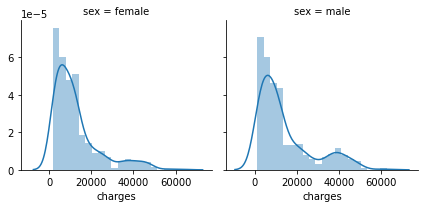

In [24]:
#create histogram of medical charges, faceted by sex
(sns.FacetGrid(data = medinsurance, 
               col = 'sex') 
 .map(sns.distplot, # type of plot
      'charges', # represents the values of the variable mm
      hist = True, # in a histogram
      bins = 20)) # the histograms have a binwidth of 20

There appears to be a similar distribution of medical charges for both male beneficiaries and female beneficiaries, with males appearing to be centered at a slightly higher value.

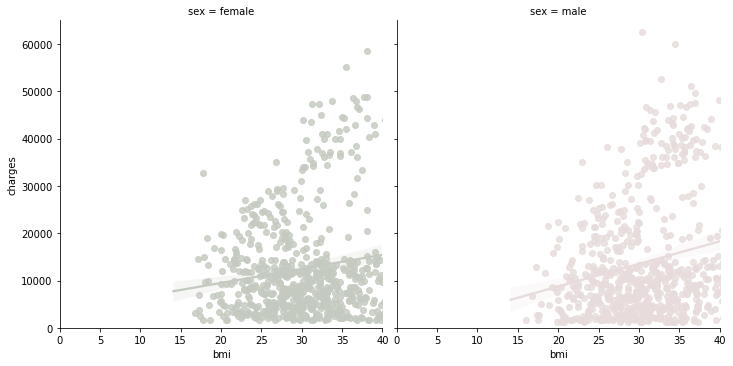

In [32]:
#create palette 
pal = dict(male="#e7dbdb", female="#c4cabf")

#create Charges vs. BMI plot with line of best fit for males and females
g = sns.lmplot(x="bmi", y="charges", col="sex", hue="sex", data=medinsurance,
               palette=pal, y_jitter=.02, logistic=False, truncate=False)
g.set(xlim=(0, 40), ylim=(0, 65000))

There appears to be a higher rate of change between charges and BMI for male beneficiaries and female beneficiaries, as seen by the steeper slope in the line of best fit for male beneficiaries. This means that for one unit increase in BMI, males see a greater increase in predicted charge for a health bill than females.
